In [1]:
# IMPORTS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# SETTING UP THE FOLDERS
folder_link = "data"
fao_csv = folder_link + "/FAO.csv"
faostat_csv = folder_link + "/FAOSTAT.csv"

# Task 1: Data Wrangling

1. Data Cleaning:
- Load both datasets into Pandas DataFrames.
- Create a data dictionary.
- Check for and handle any missing values. Provide a brief explanation of the method you used to handle missing data.
- Remove any duplicate rows from both datasets.
- Standardize column names to ensure consistency between both datasets.



In [3]:
# Load both datasets

fao_df = pd.read_csv(fao_csv, encoding='ISO-8859-1')
faostat_df = pd.read_csv(faostat_csv, encoding='ISO-8859-1')

In [4]:
fao_df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [5]:
faostat_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,35530.081,X,International reliable sources,"UNDESA, Population Division â World Populati..."
1,OA,Annual population,3,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,2930.187,X,International reliable sources,"UNDESA, Population Division â World Populati..."
2,OA,Annual population,4,Algeria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,41318.142,X,International reliable sources,"UNDESA, Population Division â World Populati..."
3,OA,Annual population,5,American Samoa,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,55.641,X,International reliable sources,"UNDESA, Population Division â World Populati..."
4,OA,Annual population,6,Andorra,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,76.965,X,International reliable sources,"UNDESA, Population Division â World Populati..."


In [6]:
fao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [7]:
faostat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       231 non-null    object 
 1   Domain            231 non-null    object 
 2   Area Code         231 non-null    int64  
 3   Area              231 non-null    object 
 4   Element Code      231 non-null    int64  
 5   Element           231 non-null    object 
 6   Item Code         231 non-null    int64  
 7   Item              231 non-null    object 
 8   Year Code         231 non-null    int64  
 9   Year              231 non-null    int64  
 10  Unit              231 non-null    object 
 11  Value             231 non-null    float64
 12  Flag              231 non-null    object 
 13  Flag Description  231 non-null    object 
 14  Note              231 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 27.2+ KB


In [4]:
# Create a data dictionary 

# function to create a data dictionary
def create_data_dictionary(df):
    data_dict = {
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Description': ['Description needed'] * len(df.columns)  # Placeholder for descriptions
    }
    return pd.DataFrame(data_dict)

# generate data dictionaries using the function
faodata_dict = create_data_dictionary(fao_df)
faostatdata_dict = create_data_dictionary(faostat_df)

# update descriptions for FAO data dictionary
descriptions_fao = {
    'Area Abbreviation': 'Abbreviation for the area (e.g., country or region)',
    'Area Code': 'Unique code assigned to the area',
    'Area': 'Name of the area (e.g., country or region)',
    'Item Code': 'Unique code for the item (e.g., crop, livestock)',
    'Item': 'Name of the item (e.g., wheat, rice)',
    'Element Code': 'Unique code for the measurement element (e.g., production, yield)',
    'Element': 'Name of the element (e.g., production, yield, consumption)',
    'Unit': 'Unit of measurement (e.g., tons, hectares)',
    'latitude': 'Latitude coordinate of the area',
    'longitude': 'Longitude coordinate of the area',
    'Y1961': 'Data for the year 1961',
    'Y1962': 'Data for the year 1962',
    'Y1963': 'Data for the year 1963',
    'Y1964': 'Data for the year 1964',
    'Y1965': 'Data for the year 1965',
    'Y1966': 'Data for the year 1966',
    'Y1967': 'Data for the year 1967',
    'Y1968': 'Data for the year 1968',
    'Y1969': 'Data for the year 1969',
    'Y1970': 'Data for the year 1970',
    'Y1971': 'Data for the year 1971',
    'Y1972': 'Data for the year 1972',
    'Y1973': 'Data for the year 1973',
    'Y1974': 'Data for the year 1974',
    'Y1975': 'Data for the year 1975',
    'Y1976': 'Data for the year 1976',
    'Y1977': 'Data for the year 1977',
    'Y1978': 'Data for the year 1978',
    'Y1979': 'Data for the year 1979',
    'Y1980': 'Data for the year 1980',
    'Y1981': 'Data for the year 1981',
    'Y1982': 'Data for the year 1982',
    'Y1983': 'Data for the year 1983',
    'Y1984': 'Data for the year 1984',
    'Y1985': 'Data for the year 1985',
    'Y1986': 'Data for the year 1986',
    'Y1987': 'Data for the year 1987',
    'Y1988': 'Data for the year 1988',
    'Y1989': 'Data for the year 1989',
    'Y1990': 'Data for the year 1990',
    'Y1991': 'Data for the year 1991',
    'Y1992': 'Data for the year 1992',
    'Y1993': 'Data for the year 1993',
    'Y1994': 'Data for the year 1994',
    'Y1995': 'Data for the year 1995',
    'Y1996': 'Data for the year 1996',
    'Y1997': 'Data for the year 1997',
    'Y1998': 'Data for the year 1998',
    'Y1999': 'Data for the year 1999',
    'Y2000': 'Data for the year 2000',
    'Y2001': 'Data for the year 2001',
    'Y2002': 'Data for the year 2002',
    'Y2003': 'Data for the year 2003',
    'Y2004': 'Data for the year 2004',
    'Y2005': 'Data for the year 2005',
    'Y2006': 'Data for the year 2006',
    'Y2007': 'Data for the year 2007',
    'Y2008': 'Data for the year 2008',
    'Y2009': 'Data for the year 2009',
    'Y2010': 'Data for the year 2010',
    'Y2011': 'Data for the year 2011',
    'Y2012': 'Data for the year 2012',
    'Y2013': 'Data for the year 2013'
}

# update the FAO dataframe with the descriptions
faodata_dict['Description'] = faodata_dict['Column Name'].map(descriptions_fao).fillna('Description needed')

# update descriptions for FAOSTAT data dictionary
descriptions_faostat = {
    'Domain Code': 'Unique code for the domain or category of data (e.g., agriculture, forestry)',
    'Domain': 'Name of the domain or category of data',
    'Area Code': 'Unique numerical code assigned to the area (e.g., country, region)',
    'Area': 'Name of the area (e.g., country or region)',
    'Element Code': 'Unique code for the type of measurement (e.g., production, yield)',
    'Element': 'Type of data being measured (e.g., production, yield, consumption)',
    'Item Code': 'Unique numerical code assigned to the item (e.g., crop, livestock)',
    'Item': 'Name of the item (e.g., wheat, rice)',
    'Year Code': 'Unique code for the year of data',
    'Year': 'Year of the data',
    'Unit': 'Unit of measurement (e.g., tons, hectares)',
    'Value': 'Measured value for the specified item, area, and year',
    'Flag': 'Indicator of data quality or special conditions (e.g., missing data, estimated values)',
    'Flag Description': 'Description of the flag used to denote data quality or special conditions',
    'Note': 'Additional notes or comments related to the data entry'
}

# update the FAOSTAT dataframe with the descriptions
faostatdata_dict['Description'] = faostatdata_dict['Column Name'].map(descriptions_faostat).fillna('Description needed')

# print updated data dictionaries
print("Updated FAO Data Dictionary:\n", faodata_dict)



Updated FAO Data Dictionary:
                          Column Name Data Type  \
Area Abbreviation  Area Abbreviation    object   
Area Code                  Area Code     int64   
Area                            Area    object   
Item Code                  Item Code     int64   
Item                            Item    object   
...                              ...       ...   
Y2009                          Y2009   float64   
Y2010                          Y2010   float64   
Y2011                          Y2011   float64   
Y2012                          Y2012     int64   
Y2013                          Y2013     int64   

                                                         Description  
Area Abbreviation  Abbreviation for the area (e.g., country or re...  
Area Code                           Unique code assigned to the area  
Area                      Name of the area (e.g., country or region)  
Item Code           Unique code for the item (e.g., crop, livestock)  
Item          

In [9]:
print("\nUpdated FAOSTAT Data Dictionary:\n", faostatdata_dict)


Updated FAOSTAT Data Dictionary:
                        Column Name Data Type  \
Domain Code            Domain Code    object   
Domain                      Domain    object   
Area Code                Area Code     int64   
Area                          Area    object   
Element Code          Element Code     int64   
Element                    Element    object   
Item Code                Item Code     int64   
Item                          Item    object   
Year Code                Year Code     int64   
Year                          Year     int64   
Unit                          Unit    object   
Value                        Value   float64   
Flag                          Flag    object   
Flag Description  Flag Description    object   
Note                          Note    object   

                                                        Description  
Domain Code       Unique code for the domain or category of data...  
Domain                       Name of the domain or categ

In [10]:
# Check for and handle any missing values. Provide a brief explanation of the method you used to handle missing data.

# Check for missing values in FAO dataset
print("FAO Dataset Missing Values:")
fao_df.info()

FAO Dataset Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64

In [11]:
# Check for and handle any missing values. Provide a brief explanation of the method you used to handle missing data.

# Check for missing values in FAOSTAT dataset
print("\nFAOSTAT Dataset Missing Values:")
faostat_df.info()


FAOSTAT Dataset Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       231 non-null    object 
 1   Domain            231 non-null    object 
 2   Area Code         231 non-null    int64  
 3   Area              231 non-null    object 
 4   Element Code      231 non-null    int64  
 5   Element           231 non-null    object 
 6   Item Code         231 non-null    int64  
 7   Item              231 non-null    object 
 8   Year Code         231 non-null    int64  
 9   Year              231 non-null    int64  
 10  Unit              231 non-null    object 
 11  Value             231 non-null    float64
 12  Flag              231 non-null    object 
 13  Flag Description  231 non-null    object 
 14  Note              231 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 27.2+ KB


In [5]:
## only FAO has null values so we will handle that

## first drop rows with everything as null
fao_df.dropna(how='all').shape

(21477, 63)

Explanation: In this scenario, we need to handle missing values in a time-series dataset. Since the dataset contains various year columns with potential missing values, we will assume that data points for nearby years are likely to be similar. This assumption is based on the idea that values for adjacent years are often correlated, and drastic changes from one year to the next are unlikely.

To address missing values, we use the fillna() method from Pandas, which provides strategies to fill these gaps. Specifically, we’ll use two methods:

'ffill' (Forward Fill): This method propagates the last valid observation forward to the next missing value. It’s based on the assumption that the data from the previous year is a good estimate for the missing data in the current year. In other words, if a year’s data is missing, it will be filled with the most recent previous year’s value.

'bfill' (Backward Fill): This method propagates the next valid observation backward to fill the missing value. It assumes that if a future year’s data is available, it can be used to fill in the missing values for earlier years. This approach fills missing values with the subsequent year’s value if available.

In [6]:
## dropping rows with everything as null removed nothing, which means only specific columns for each row have null values

## based on the observation of the data in FAO, some years start with null values (e.g., years where no data is provided) but later years have data, therefore we cannot simply
## delete those rows because the data for later years are still valuable data

## to handle the missing values, we perform a forward fill and a backward fill

# check for missing values in the FAO dataset
print("Initial Missing Values Summary:")
print(fao_df.isnull().sum())

# Identify year columns (assuming they start with 'Y')
year_columns = [col for col in fao_df.columns if col.startswith('Y')]

# display the columns identified for year data
print("Year Columns:")
print(year_columns)

# apply forward fill to year columns
fao_df[year_columns] = fao_df[year_columns].fillna(method='ffill', axis=1)

# apply backward fill to any remaining missing values
fao_df[year_columns] = fao_df[year_columns].fillna(method='bfill', axis=1)

# verify missing values after handling
print("\nMissing Values After Handling:")
print(fao_df.isnull().sum())

# print a sample of the cleaned data to verify
print("\nSample of Cleaned FAO Data:")
print(fao_df.head())

Initial Missing Values Summary:
Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64
Year Columns:
['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013']

Missing Values After Handling:
Area Abbreviation    0
Area Code            0
Area                 0
Item Code            0
Item                 0
                    ..
Y2009 

C:\Users\admin\AppData\Local\Temp\ipykernel_13900\3541634840.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fao_df[year_columns] = fao_df[year_columns].fillna(method='ffill', axis=1)
C:\Users\admin\AppData\Local\Temp\ipykernel_13900\3541634840.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fao_df[year_columns] = fao_df[year_columns].fillna(method='bfill', axis=1)


In [14]:
fao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              21477 non-null  float64
 11  Y1962              21477 non-null  float64
 12  Y1963              21477 non-null  float64
 13  Y1964              21477 non-null  float64
 14  Y1965              21477 non-null  float64
 15  Y1966              21477 non-null  float64
 16  Y1967              214

In [7]:
# Removing Duplicatites

# Check initial counts of duplicate rows
print("Initial Duplicate Rows in FAO Dataset:", fao_df.duplicated().sum())
print("Initial Duplicate Rows in FAOSTAT Dataset:", faostat_df.duplicated().sum())

# Remove duplicate rows from FAO dataset
fao_df_cleaned = fao_df.drop_duplicates()

# Remove duplicate rows from FAOSTAT dataset
faostat_df_cleaned = faostat_df.drop_duplicates()

# Verify that duplicates have been removed
print("\nDuplicate Rows After Cleaning in FAO Dataset:", fao_df_cleaned.duplicated().sum())
print("Duplicate Rows After Cleaning in FAOSTAT Dataset:", faostat_df_cleaned.duplicated().sum())


Initial Duplicate Rows in FAO Dataset: 0
Initial Duplicate Rows in FAOSTAT Dataset: 0

Duplicate Rows After Cleaning in FAO Dataset: 0
Duplicate Rows After Cleaning in FAOSTAT Dataset: 0


In [16]:
fao_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              21477 non-null  float64
 11  Y1962              21477 non-null  float64
 12  Y1963              21477 non-null  float64
 13  Y1964              21477 non-null  float64
 14  Y1965              21477 non-null  float64
 15  Y1966              21477 non-null  float64
 16  Y1967              214

In [17]:
faostat_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       231 non-null    object 
 1   Domain            231 non-null    object 
 2   Area Code         231 non-null    int64  
 3   Area              231 non-null    object 
 4   Element Code      231 non-null    int64  
 5   Element           231 non-null    object 
 6   Item Code         231 non-null    int64  
 7   Item              231 non-null    object 
 8   Year Code         231 non-null    int64  
 9   Year              231 non-null    int64  
 10  Unit              231 non-null    object 
 11  Value             231 non-null    float64
 12  Flag              231 non-null    object 
 13  Flag Description  231 non-null    object 
 14  Note              231 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 27.2+ KB


In [8]:
# Standardize column names to ensure consistency between both datasets.

# Change column names to uppercase
fao_df_cleaned.columns = fao_df_cleaned.columns.str.upper()
faostat_df_cleaned.columns = faostat_df_cleaned.columns.str.upper()

# Change column with spaces replaced with underscores _
fao_df_cleaned.columns = fao_df_cleaned.columns.str.replace(' ', '_')
faostat_df_cleaned.columns = faostat_df_cleaned.columns.str.replace(' ', '_')

# Display updated column names for verification
print("Updated FAO Columns:", fao_df_cleaned.columns)
print("Updated FAOSTAT Columns:", faostat_df_cleaned.columns)



Updated FAO Columns: Index(['AREA_ABBREVIATION', 'AREA_CODE', 'AREA', 'ITEM_CODE', 'ITEM',
       'ELEMENT_CODE', 'ELEMENT', 'UNIT', 'LATITUDE', 'LONGITUDE', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')
Updated FAOSTAT Columns: Index(['DOMAIN_CODE', 'DOMAIN', 'AREA_CODE', 'AREA', 'ELEMENT_CODE', 'ELEMENT',
       'ITEM_CODE', 'ITEM', 'YEAR_CODE', 'YEAR', 'UNIT', 'VALUE', 'FLAG',
       'FLAG_DESCRIPTION', 'NOTE'],
      dtype='object')


2. Data Merging:
- Merge the two datasets using a relevant key (e.g., Country, Year, or any other common column). Justify your choice of the merging key(s).
- Create a new DataFrame with the merged data. Ensure the merged DataFrame contains only the columns necessary for analysis.

In [9]:
# Merge the two datasets using a relevant key (e.g., Country, Year, or any other common column). Justify your choice of the merging key(s).
# Create a new DataFrame with the merged data. Ensure the merged DataFrame contains only the columns necessary for analysis.

# transform FAO data - melt the year columns into rows
# compile all column names for years
year_columns = [col for col in fao_df.columns if col.startswith('Y')]

# perform the melt operation
fao_melted_df = pd.melt(fao_df_cleaned, id_vars=['AREA_CODE', 'AREA', 'ITEM_CODE', 'ELEMENT_CODE', 'ITEM', 'ELEMENT'], 
                        value_vars=year_columns, var_name='YEAR', value_name='PRODUCTION_VALUE')

# clean the 'Year' column (remove the 'Y' prefix and convert to int)
fao_melted_df['YEAR'] = fao_melted_df['YEAR'].str[1:].astype(int)

# Merge the transformed FAO data with FAOSTAT data on relevant columns
merged_df = pd.merge(fao_melted_df, faostat_df_cleaned, on=['AREA_CODE', 'AREA', 'ELEMENT_CODE', 'ITEM_CODE', 'ITEM', 'ELEMENT', 'YEAR'], how='outer')

# select only the necessary columns for analysis
columns_to_keep = ['AREA', 'YEAR', 'ITEM', 'ELEMENT', 'PRODUCTION_VALUE', 'VALUE']  # Adjust as needed
merged_df = merged_df[columns_to_keep]

# rename value column to match PRODUCTION_VALUE 
merged_df.rename(columns={'VALUE': 'POPULATION_VALUE'}, inplace=True)

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138512 entries, 0 to 1138511
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   AREA              1138512 non-null  object 
 1   YEAR              1138512 non-null  int64  
 2   ITEM              1138512 non-null  object 
 3   ELEMENT           1138512 non-null  object 
 4   PRODUCTION_VALUE  1138281 non-null  float64
 5   POPULATION_VALUE  231 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 52.1+ MB


In [20]:
# NaN values will be kept, since some rows do not necessarily reflect PRODUCTION and POPULATION
# filling them with other values (such as '0' or 'N/A') may lead to confusion
merged_df.head()

,AREA,YEAR,ITEM,ELEMENT,PRODUCTION_VALUE,POPULATION_VALUE
0,Armenia,2017,Population - Est. & Proj.,Total Population - Both sexes,NaN,2930.45
1,Armenia,1961,Wheat and products,Food,539.0,NaN
2,Armenia,1962,Wheat and products,Food,539.0,NaN
3,Armenia,1963,Wheat and products,Food,539.0,NaN
4,Armenia,1964,Wheat and products,Food,539.0,NaN


3. Feature Engineering:
- Create at least two new columns based on the existing data. For example, you could calculate the per capita values or growth rates. Clearly explain the rationale behind these new features.

In [10]:
# Define the mapping of countries to continents
country_to_continent = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bolivia (Plurinational State of)': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China, Hong Kong SAR': 'Asia',
    'China, Macao SAR': 'Asia',
    'China, mainland': 'Asia',
    'China, Taiwan Province of': 'Asia',
    'Colombia': 'South America',
    'Congo': 'Africa',
    'Costa Rica': 'North America',
    'Côte d\'Ivoire': 'Africa',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Democratic People\'s Republic of Korea': 'Asia',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Polynesia': 'Oceania',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Lao People\'s Democratic Republic': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Republic of Korea': 'Asia',
    'Republic of Moldova': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Sierra Leone': 'Africa',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Swaziland': 'Africa',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'The former Yugoslav Republic of Macedonia': 'Europe',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Viet Nam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

# Add the new 'CONTINENT' column to the dataset
merged_df['CONTINENT'] = merged_df['AREA'].map(country_to_continent)


In [11]:
# Feature 2: Production Growth

merged_df.sort_values(by=['AREA', 'YEAR'], inplace=True)
merged_df['PRODUCTION_GROWTH'] = merged_df.groupby('AREA')['PRODUCTION_VALUE'].pct_change()


C:\Users\admin\AppData\Local\Temp\ipykernel_13900\2193812590.py:4: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged_df['PRODUCTION_GROWTH'] = merged_df.groupby('AREA')['PRODUCTION_VALUE'].pct_change()


In [23]:
merged_df.head()

,AREA,YEAR,ITEM,ELEMENT,PRODUCTION_VALUE,POPULATION_VALUE,CONTINENT,PRODUCTION_GROWTH
7051,Afghanistan,1961,Wheat and products,Food,1928.0,NaN,Asia,NaN
7104,Afghanistan,1961,Barley and products,Food,237.0,NaN,Asia,-0.877075
7157,Afghanistan,1961,Maize and products,Food,403.0,NaN,Asia,0.700422
7210,Afghanistan,1961,Millet and products,Food,17.0,NaN,Asia,-0.957816
7263,Afghanistan,1961,"Cereals, Other",Food,0.0,NaN,Asia,-1.000000


# Task 2: Data Exploration

1. Descriptive Statistics:
    - Provide summary statistics for key variables of interest (mean, median, standard deviation, etc.).
    - Identify and discuss any significant patterns or outliers in the data.

In [24]:
# Provide summary statistics for key variables of interest (mean, median, standard deviation, etc.).
summary_numerical = merged_df.describe()
print("\nSummary Statistics for Numerical Columns: \n",summary_numerical)
print("")

# Summary statistics for categorical columns
summary_categorical = merged_df[['AREA', 'ITEM', 'ELEMENT', 'CONTINENT']].describe()
# Print summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:\n", summary_categorical)


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)



Summary Statistics for Numerical Columns: 
                YEAR  PRODUCTION_VALUE  POPULATION_VALUE  PRODUCTION_GROWTH
count  1.138512e+06      1.138281e+06      2.310000e+02       9.251100e+05
mean   1.987006e+03      3.614305e+02      3.892280e+04                inf
std    1.530148e+01      3.684178e+03      1.618314e+05                NaN
min    1.961000e+03     -2.460000e+02      7.920000e-01      -2.470000e+02
25%    1.974000e+03      0.000000e+00      4.979780e+02      -9.758551e-01
50%    1.987000e+03      4.000000e+00      5.708844e+03      -5.549955e-02
75%    2.000000e+03      5.000000e+01      2.117713e+04       4.400000e+01
max    2.017000e+03      4.892990e+05      1.441131e+06                inf


Summary Statistics for Categorical Columns:
            AREA                     ITEM  ELEMENT CONTINENT
count   1138512                  1138512  1138512   1138452
unique      234                      116        3         6
top       Spain  Milk - Excluding Butter     Food    

In [25]:
# Identify any significant patterns or outliers
# For simplicity, this will check for outliers using the IQR method for numerical columns

# Function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Checking for outliers in each numerical column
for col in ['PRODUCTION_VALUE']: #, 'POPULATION_VALUE', 'PRODUCTION_GROWTH'
    outliers = detect_outliers(merged_df, col)
    print(f"\nOutliers in '{col}':\n", outliers)


Outliers in 'PRODUCTION_VALUE':
                AREA  YEAR                             ITEM ELEMENT  \
7051    Afghanistan  1961               Wheat and products    Food   
7104    Afghanistan  1961              Barley and products    Food   
7157    Afghanistan  1961               Maize and products    Food   
8270    Afghanistan  1961                Vegetables, Other    Food   
8641    Afghanistan  1961  Grapes and products (excl wine)    Food   
...             ...   ...                              ...     ...   
831199     Zimbabwe  2013                       Vegetables    Food   
831252     Zimbabwe  2013          Fruits - Excluding Wine    Food   
831411     Zimbabwe  2013              Alcoholic Beverages    Food   
831517     Zimbabwe  2013                             Meat    Food   
831676     Zimbabwe  2013          Milk - Excluding Butter    Food   

        PRODUCTION_VALUE  POPULATION_VALUE CONTINENT  PRODUCTION_GROWTH  
7051              1928.0               NaN      Asi

In [26]:
for col in ['POPULATION_VALUE']: #, 'PRODUCTION_GROWTH'
    outliers = detect_outliers(merged_df, col)
    print(f"\nOutliers in '{col}':\n", outliers)


Outliers in 'POPULATION_VALUE':
                                      AREA  YEAR                       ITEM  \
69762                          Bangladesh  2017  Population - Est. & Proj.   
94836                              Brazil  2017  Population - Est. & Proj.   
1138511                             China  2017  Population - Est. & Proj.   
177161                    China, mainland  2017  Population - Est. & Proj.   
1099702  Democratic Republic of the Congo  2017  Population - Est. & Proj.   
265527                              Egypt  2017  Population - Est. & Proj.   
1081517                          Ethiopia  2017  Population - Est. & Proj.   
300356                             France  2017  Population - Est. & Proj.   
339000                            Germany  2017  Population - Est. & Proj.   
439190                              India  2017  Population - Est. & Proj.   
446293                          Indonesia  2017  Population - Est. & Proj.   
452972         Iran (Islamic R

In [27]:
for col in ['PRODUCTION_GROWTH']: #, 
    outliers = detect_outliers(merged_df, col)
    print(f"\nOutliers in '{col}':\n", outliers)


Outliers in 'PRODUCTION_GROWTH':
                AREA  YEAR                        ITEM ELEMENT  \
7316    Afghanistan  1961       Potatoes and products    Food   
7475    Afghanistan  1961  Pulses, Other and products    Food   
7634    Afghanistan  1961                 Sesame seed    Food   
7846    Afghanistan  1961           Sunflowerseed Oil    Food   
7952    Afghanistan  1961              Cottonseed Oil    Food   
...             ...   ...                         ...     ...   
830669     Zimbabwe  2013    Rice (Milled Equivalent)    Food   
830934     Zimbabwe  2013          Sugar & Sweeteners    Food   
831517     Zimbabwe  2013                        Meat    Food   
831888     Zimbabwe  2013         Barley and products    Feed   
832153     Zimbabwe  2013                  Cottonseed    Feed   

        PRODUCTION_VALUE  POPULATION_VALUE CONTINENT  PRODUCTION_GROWTH  
7316               111.0               NaN      Asia                inf  
7475                15.0            

2. Group-Based Analysis:

    - Perform a group-by operation based on a relevant categorical variable (e.g., Year, Country, or Region).
    - Analyze the aggregated data to identify trends over time or differences between groups. Visualize your findings using appropriate plots.

Aggregated Data by CONTINENT:
          CONTINENT  YEAR  PRODUCTION_VALUE  PRODUCTION_GROWTH
0           Africa  1961         58.092355                inf
1           Africa  1962         59.601265                inf
2           Africa  1963         60.985821                inf
3           Africa  1964         62.287411                inf
4           Africa  1965         63.940410                inf
..             ...   ...               ...                ...
319  South America  2010        492.788018                inf
320  South America  2011        512.776827                inf
321  South America  2012        506.181040                inf
322  South America  2013        515.252798                inf
323  South America  2017               NaN                0.0

[324 rows x 4 columns]


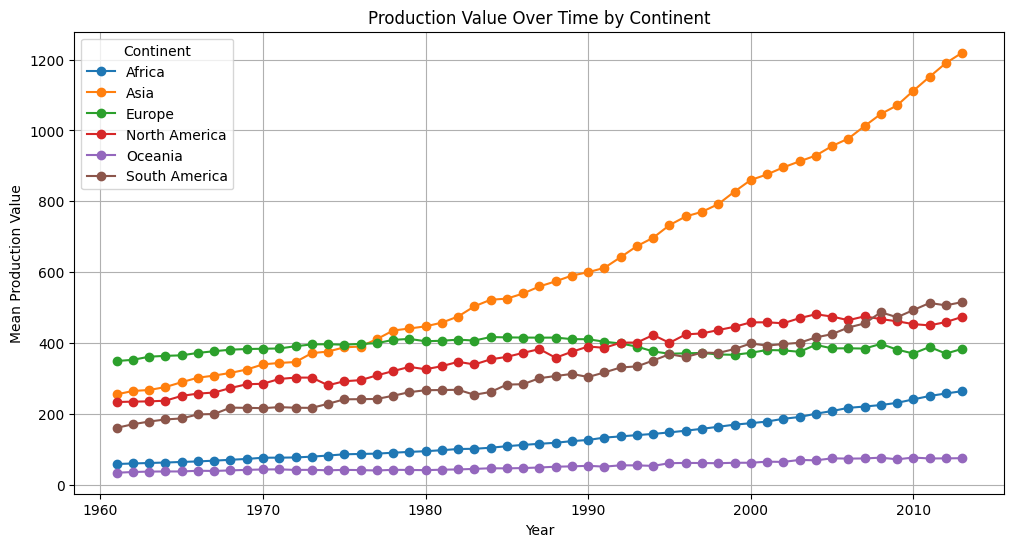

In [30]:
# Perform a group-by operation based on a relevant categorical variable (e.g., Year, Country, or Region).
# Analyze the aggregated data to identify trends over time or differences between groups. Visualize your findings using appropriate plots.

# Group-by operation based on 'YEAR' and 'CONTINENT'
grouped_continent_data = merged_df.groupby(['CONTINENT', 'YEAR']).agg({
    'PRODUCTION_VALUE': 'mean',
    'PRODUCTION_GROWTH': 'mean'
}).reset_index()

# Print the aggregated data
print("Aggregated Data by CONTINENT:\n", grouped_continent_data)

# Visualize
# Plotting trends over time for 'PRODUCTION_VALUE'
plt.figure(figsize=(12, 6))
for continent in grouped_continent_data['CONTINENT'].unique():
    plt.plot(grouped_continent_data[grouped_continent_data['CONTINENT'] == continent]['YEAR'], 
             grouped_continent_data[grouped_continent_data['CONTINENT'] == continent]['PRODUCTION_VALUE'], 
             marker='o', label=continent)

plt.title('Production Value Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Mean Production Value')
plt.legend(title='Continent')
plt.grid(True)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_3916\907064777.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CONTINENT', y='POPULATION_VALUE', data=grouped_pop_continent_data, palette='magma')


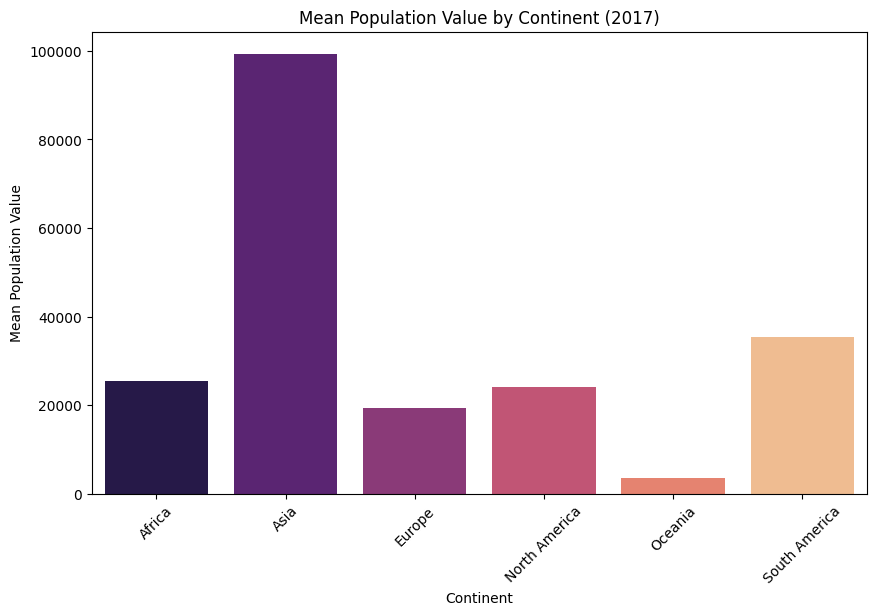

In [52]:
grouped_pop_continent_data = merged_df.groupby(['CONTINENT', 'YEAR']).agg({
    'POPULATION_VALUE': 'mean',
}).reset_index()

# Mean Population Value by Continent (2017 only)
plt.figure(figsize=(10, 6))
sns.barplot(x='CONTINENT', y='POPULATION_VALUE', data=grouped_pop_continent_data, palette='magma')
plt.title('Mean Population Value by Continent (2017)')
plt.xlabel('Continent')
plt.ylabel('Mean Population Value')
plt.xticks(rotation=45)
plt.show()

Aggregated Data by Continent (excluding infinite values):
        CONTINENT  PRODUCTION_GROWTH
0         Africa          12.143950
1           Asia          19.378134
2         Europe          25.072695
3  North America          14.473264
4        Oceania           6.750965
5  South America          18.954090


C:\Users\admin\AppData\Local\Temp\ipykernel_3916\2395079054.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CONTINENT', y='PRODUCTION_GROWTH', data=grouped_data, palette='magma')


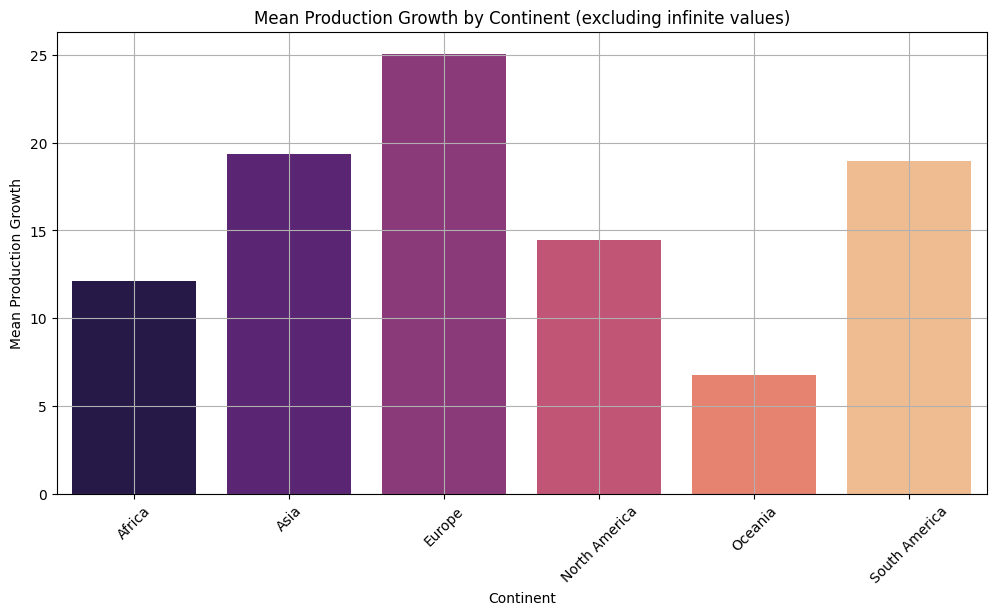

In [74]:
# Filter out infinite values
filtered_df = merged_df[~np.isinf(merged_df['PRODUCTION_GROWTH'])]

# Perform the group-by operation and calculate the mean
grouped_data = filtered_df.groupby('CONTINENT').agg({
    'PRODUCTION_GROWTH': 'mean'
}).reset_index()

# Print the aggregated data
print("Aggregated Data by Continent (excluding infinite values):\n", grouped_data)

# Plot the aggregated data
plt.figure(figsize=(12, 6))
sns.barplot(x='CONTINENT', y='PRODUCTION_GROWTH', data=grouped_data, palette='magma')

plt.title('Mean Production Growth by Continent (excluding infinite values)')
plt.xlabel('Continent')
plt.ylabel('Mean Production Growth')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

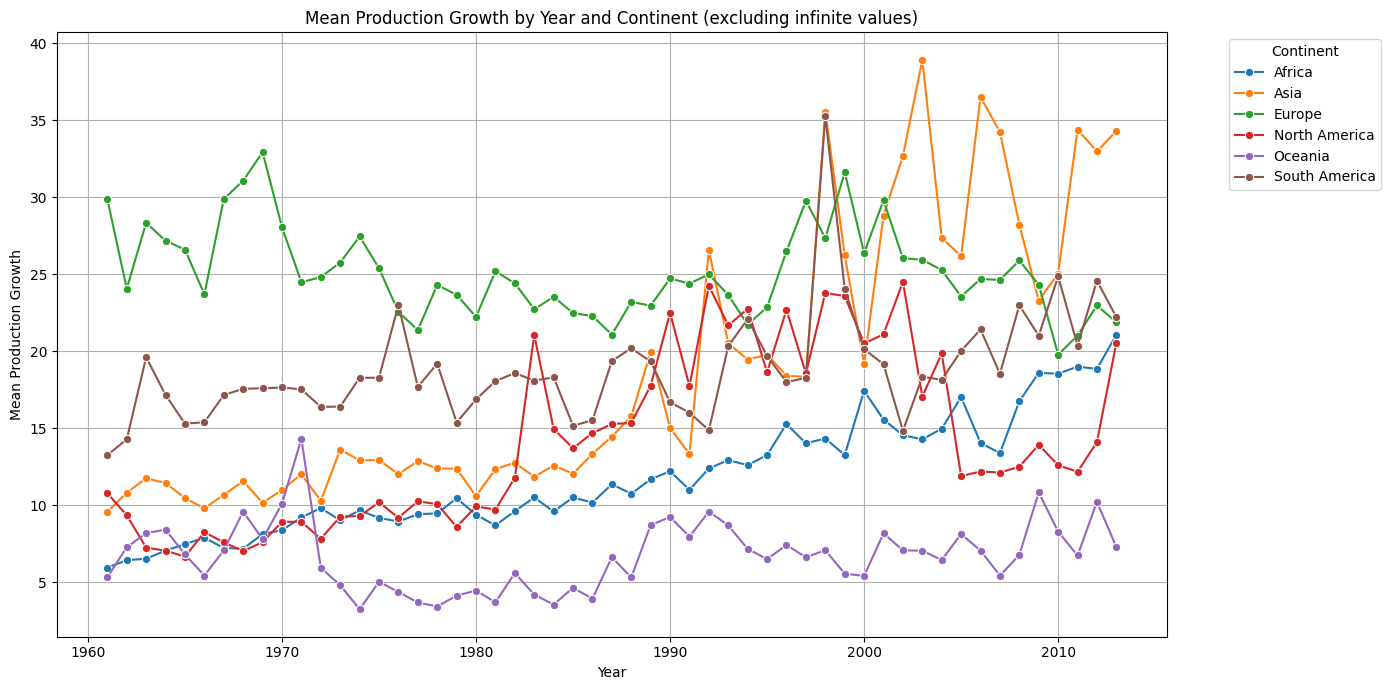

In [13]:
# Filter out infinite values
filtered_df = merged_df[~np.isinf(merged_df['PRODUCTION_GROWTH'])]
filtered_df = filtered_df[filtered_df['YEAR'] != 2017]

# Perform the group-by operation and calculate the mean, grouping by both 'YEAR' and 'CONTINENT'
grouped_data = filtered_df.groupby(['YEAR', 'CONTINENT']).agg({
    'PRODUCTION_GROWTH': 'mean'
}).reset_index()

# Plot the aggregated data
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_data, x='YEAR', y='PRODUCTION_GROWTH', hue='CONTINENT', marker='o')

plt.title('Mean Production Growth by Year and Continent (excluding infinite values)')
plt.xlabel('Year')
plt.ylabel('Mean Production Growth')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()


`NOTE:` The row **PRODUCTION_GROWTH** contains rows with **inf** values, it is possible to exclude them if we would like to see the **GENERAL** differences and trend. In addition, 2017 was also exluded because of the values it has that does not provide significant insights into showing the trend.


3. Correlation Analysis:
    - Compute the correlation matrix for the numerical variables in your dataset.
    - Identify and discuss any strong correlations. Use a heatmap to visualize the correlation matrix.

Correlation Matrix:
                        YEAR  PRODUCTION_VALUE  POPULATION_VALUE  \
YEAR               1.000000          0.028007               NaN   
PRODUCTION_VALUE   0.028007          1.000000               NaN   
POPULATION_VALUE        NaN               NaN               1.0   
PRODUCTION_GROWTH  0.013821          0.096668               NaN   

                   PRODUCTION_GROWTH  
YEAR                        0.013821  
PRODUCTION_VALUE            0.096668  
POPULATION_VALUE                 NaN  
PRODUCTION_GROWTH           1.000000  


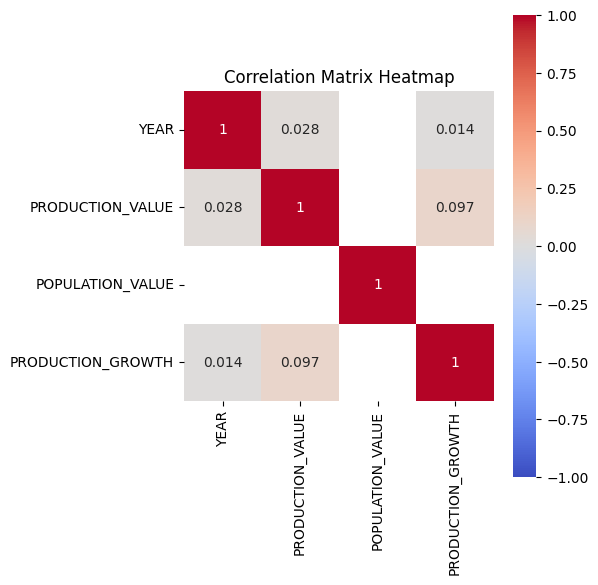

In [66]:
# Compute the correlation matrix for the numerical variables in your dataset.
# Identify and discuss any strong correlations. Use a heatmap to visualize the correlation matrix.

# Compute the correlation matrix for the numerical variables
correlation_matrix = merged_df[['YEAR','PRODUCTION_VALUE', 'POPULATION_VALUE', 'PRODUCTION_GROWTH']].corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(5,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

# Task 3: Data Visualization

1. Time Series Analysis:
    - Create a line plot showing trends over time for at least two variables. Ensure the plot is well-labeled and includes a legend.
    - Discuss any noticeable trends or patterns in the data over time.

In [63]:
# Create a line plot showing trends over time for at least two variables.
# Discuss any noticeable trends or patterns in the data over time.

2. Comparison Plot:
    - Create a bar chart or box plot to compare the distributions of a variable across different categories (e.g., regions, countries).
    - Provide insights based on your visualization.

In [64]:
# Create a bar chart or box plot to compare the distributions of a variable across different categories (e.g., regions, countries).
# Provide insights based on your visualization.

3. Geographical Visualization (Optional Advanced Task):
    - If applicable, create a choropleth map showing the distribution of a key variable across different countries or regions.
    - Analyze the geographical trends you observe.

In [65]:
# If applicable, create a choropleth map showing the distribution of a key variable across different countries or regions.
# Analyze the geographical trends you observe.

# Task 4: Drawing Conclusions


1. Analysis Summary:
    - Based on your analysis and visualizations, write a short report summarizing your findings.
    - Highlight key insights, trends, and any surprising results.
    - Discuss the potential implications of your findings in the context of global food security, agricultural production, or trade.

In [66]:
# Insert Summary

2. Actionable Recommendations:
    - Based on the data analysis, provide at least two recommendations for policymakers or stakeholders in the agriculture sector.
    - Justify your recommendations with specific references to the data and visualizations you’ve created.

In [67]:
# Insert Recommendations